## ENSE 496AD - Lab 5 - Rapid Development using TensorFlow and Keras

In this lab you will learn to use the use the Keras Tensorflow API to rapidly prototype and test Machine Learning algorithms. You will start with a tutorial model, and then extend it to accomplish a more complicated use case.

First you will use TensorFlow / Keras to classify MNIST digits, starting with a simple Fully Connected Neural Network, then extending it to a Convolutional Neural Network. Finally, you will use what you learned to apply these techniques to classifying general images from the CIFAR dataset.

The following cells include code from the tutorial here: 
https://www.tensorflow.org/tutorials/quickstart/beginner

Feel free to read their comments and documentation in anything if there is anything in this workbook you don't understand.

### Part 1 - MNIST Classification using Tensorflow / Keras and a Fully Connected Network

In this part of the notebook you will follow along with a tutorial for classifying MNIST digits using TensorFlow / Keras.

Begin by importing TensorFlow, downloading the MNIST dataset, and then creating training and test sets

In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST pixel values are in the range of 0...255, and we want
# them to be in the range of 0...1, so we divide each sample by 255.0

x_train, x_test = x_train / 255.0, x_test / 255.0

Let's visualize one of the digits from our training set

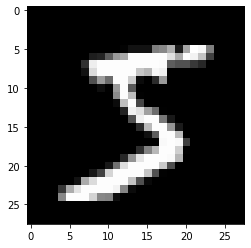

In [70]:
sample = x_train[:1]
plt.imshow(sample[0], interpolation='nearest', cmap="gray")
plt.show()

In the next cell we will define our model. Models in Keras / TensorFlow are like data structures - they define the overall shape and operations of our model, but will not actually train until we explicity tell them to.

In [71]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten operation unrows an image - now each pixel is just a number from 0.0 to 1.0
  tf.keras.layers.Dense(128, activation='relu'), # linear (wx + b) with 128 output nodes. How many learnable parameters in this layer?
  tf.keras.layers.Dense(10) # Output is 10 nodes, because we have 10 classes.  How many learnable parameters here?
])

In the next cell, we will compute the scores for our model. The higher the value, the more likely that the sample belongs to a given class. Because we have not trained our model yet, these values are random. You may ignore the deprecation warning if you see one.

In [72]:
scores = model(sample).numpy()
print ("Scores: ", scores)

Scores:  [[ 0.49069095  0.99980295  0.24156685  0.24986252 -0.67439544  0.28085417
   0.06124504 -0.22611523  0.8431674  -0.34390736]]


Now we will use the softmax function, which maps scores to probabilities. The higher the probability, the more likely that the test sample belongs to a given class, but again, remember that the values are still random.

In [73]:
probabilities = tf.nn.softmax(scores).numpy()
print ("Probabilities: ", probabilities)

Probabilities:  [[0.11979349 0.19931398 0.09337701 0.09415486 0.03736307 0.09711856
  0.07796995 0.05849629 0.17041656 0.05199622]]


Finally, using argmax, we can predict a class for our sample. Again, this is just random, so don't worry about the results!

In [74]:
label = np.argmax(probabilities)
print ("label: ", label)

label:  1


Now we will compute our loss function for our sample. This is explained as following in the tutorial:

"This loss is equal to the negative log probability of the true class: It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.log(1/10) ~= 2.3."

In [75]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print("loss:", loss_fn(y_train[:1], probabilities).numpy())

loss: 2.3066683


In order to train our model, we must first compile it. In this step we must specify the training method (optimization, such as stochastic gradient descent (sgd)), and the loss function, which we defined earlier.

In [76]:
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])


We can get some additional information about our model using the following cell. Do the number of parameters match what we would expect?

In [77]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The following cell actually trains the model, by feeding in our dataset, computing gradients, and updating weights, but this is all abstracted away. The learned parameters are saved after the training completes, so as long as you do not recompile your model, you could keep running this cell to continually train the model, 5 epochs at a time. Additionally, the first line of code is Jupyter "magic" to  time a single training pass, so you can see how long it takes. My 2GPU deep learning machine takes 14.5 seconds. Google colab takes about 16 seconds.

In [78]:
%%timeit -n 1 -r 1
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6490 - accuracy: 0.8367
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3364 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2872 - accuracy: 0.9187
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2562 - accuracy: 0.9281
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2325 - accuracy: 0.9344
1 loop, best of 1: 16.3 s per loop


Let's use the trained model to classify our test sample from earlier. Does it predict correctly?

In [79]:
scores = model(sample).numpy()
print ("Scores: ", scores)
probabilities = tf.nn.softmax(scores).numpy()
print ("Probabilities: ", probabilities)
label = np.argmax(probabilities)
print ("label: ", label)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print("loss:", loss_fn(y_train[:1], probabilities).numpy())

Scores:  [[ 1.0490459  -2.493275    1.5679827   4.7722387  -6.7006564   7.5201564
  -2.6503074   0.7415231   0.4073321  -0.30178863]]
Probabilities:  [[1.4453952e-03 4.1838495e-05 2.4286108e-03 5.9834085e-02 6.2277849e-07
  9.3401557e-01 3.5758389e-05 1.0627501e-03 7.6084066e-04 3.7439194e-04]]
label:  5
loss: 1.5180684


Are we overfit? What is the test loss?

In [80]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print ("test loss:", test_loss)
print ("test accuracy:", test_acc)

test loss: 0.2159201204776764
test accuracy: 0.939300000667572


Let's try one more pass of training to see if the results improve

In [81]:
%%timeit -n 1 -r 1
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2137 - accuracy: 0.9397
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1978 - accuracy: 0.9443
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1841 - accuracy: 0.9485
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1724 - accuracy: 0.9514
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1622 - accuracy: 0.9546
1 loop, best of 1: 16.1 s per loop


Let's benchmark our new sample. Did it predict correctly? Did the loss decrease?

In [82]:
scores = model(sample).numpy()
print ("Scores: ", scores)
probabilities = tf.nn.softmax(scores).numpy()
print ("P`brobabilities: ", probabilities)
label = np.argmax(probabilities)
print ("label: ", label)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print("loss:", loss_fn(y_train[:1], probabilities).numpy())

Scores:  [[ 0.1524478 -1.9390508  2.476628   5.7053056 -8.027912   9.756088
  -3.433424   0.5397663 -0.3379607 -0.2989412]]
P`brobabilities:  [[6.6265988e-05 8.1839780e-06 6.7712594e-04 1.7094886e-02 1.8561176e-08
  9.8197120e-01 1.8363961e-06 9.7611497e-05 4.0579733e-05 4.2194395e-05]]
label:  5
loss: 1.476582


Again, check to see if we are overfit

In [83]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print ("test loss:", test_loss)
print ("test accuracy:", test_acc)

test loss: 0.1582278162240982
test accuracy: 0.9552000164985657


This model is good for learning about TensorFlow and Keras, but does not employ all of the industry standard optimizations in image classification. In the next cell we will iterate to a better model for image classification using Convolutional Neural Networks.

### Part 2: MNIST Classification using TensorFlow / Keras and a Convolutional Neural Network

In this part of the workbook, you will modify the previous model, which is still pretty good, to using industry standard techniques for image classification.

In this section you will refactor the code to use Conv2D layers in place of Desnse layers. Build the following network:
- Conv2D with 2 kernels of size 3x3, relu activation, appropriate input
- Conv2D with 4 kernels of size 3x3, relu activation
- Conv2D with 8 kernels of size 3x3, relu activation
- Flatten
- Dense with 10 outputs

In [84]:
model = tf.keras.models.Sequential([
    # your code here!
    tf.keras.layers.Conv2D(2, (3, 3),input_shape=(28, 28,1), activation='relu'), 
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

Recompile and run your model. Try using the Adaptive Momentum (Adam) Optimizer.

In [85]:
model.compile(optimizer='Adam',
              loss=loss_fn,
              metrics=['accuracy'])

Preview your model below:

In [86]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 2)         20        
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 4)         76        
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 22, 22, 8)         296       
_________________________________________________________________
flatten_25 (Flatten)         (None, 3872)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                38730     
Total params: 39,122
Trainable params: 39,122
Non-trainable params: 0
_________________________________________________________________


The following code block will interpret the training and test set as images, which is required for the Conv2D Layer:

In [87]:
# 28 x 28 x 1 = 28 x 28 pixels by 1 channel (grayscale). Note that color (RGB) images have 3 channels.
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0] , 28, 28, 1))

Train the network using the following test cell:

In [88]:
%%timeit -n 1 -r 1
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3004 - accuracy: 0.9103
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1409 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1062 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0865 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0730 - accuracy: 0.9775
1 loop, best of 1: 23.8 s per loop


As before, what is the test accuracy of the model. Is it overfit?

In [89]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print ("test loss:", test_loss)
print ("test accuracy:", test_acc)

#this method is not overfit, take a little bit loger but have a better accuracy

test loss: 0.07356223464012146
test accuracy: 0.9751999974250793


How did this model compare to the previous one? Did it take longer to train? Did it perform better?

### Part 3: CIFAR-10 Classification using TensorFlow / Keras

In this part of the workbook you will extend the Convolutional MNIST network. Your goal is to create a neural network architecture which can get more than 70% test accuracy in 10 training epochs.

Download the cifar10 dataset using TensorFlow / Keras. Warning, the dataset is ~170MB.

In [90]:
cifar10 =  tf.keras.datasets.cifar10
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Shift the pixel values from the range 0...255 to 0.0...1.0

In [91]:
x_train, x_test = x_train / 255.0, x_test / 255.0

The following cell adds a human readable label to each of the outputs

In [92]:
y_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

As before, print out a sample image from the Dataset, and use the y_labels to add the appropriate label to the figure

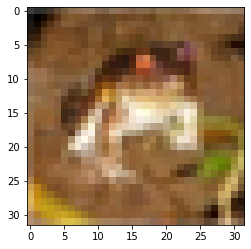

In [93]:
sample = x_train[:1]
plt.imshow(sample[0],interpolation='nearest', cmap="gray")
plt.show()

Generate your model below. Here are some hints:
- Include multiple convolutional 2D layers
- Double the number of nodes in each successive convolution layers, eg. 4, 8, 16 etc.
- Include MaxPooling2D layers between the convolutional layers, which greatly reduces the number of pixels while still maintaining detected intermediate features
- After flattening the model, use an extra Dense layers

In [94]:
model = tf.keras.models.Sequential([
    # your code here!
    tf.keras.layers.Conv2D(32, (3, 3),input_shape=(32, 32,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
])
scores = model(sample).numpy()
print ("Scores: ", scores)
probabilities = tf.nn.softmax(scores).numpy()
print ("P`brobabilities: ", probabilities)
label = np.argmax(probabilities)
print ("label: ", y_labels[label])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print("loss:", loss_fn(y_train[:1], probabilities).numpy())

Scores:  [[-0.04856309  0.02983076 -0.0550539   0.02576943  0.05464709 -0.04244331
  -0.05267793  0.03044238  0.03547399  0.12763591]]
P`brobabilities:  [[0.09411272 0.10178749 0.09350383 0.10137492 0.10434508 0.09469043
  0.09372626 0.10184976 0.10236351 0.11224593]]
label:  truck
loss: 2.308875


Train your model. Use an appropriate loss function and optimizer. 

In [95]:
model.compile(optimizer='Adam',
              loss=loss_fn,
              metrics=['accuracy'])

Print a summary of your model. Does it match your expectations?

In [96]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 512)             

Train your model with a maximum of 10 training epochs.

In [99]:
%%timeit -n 1 -r 1
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5425 - accuracy: 0.8084
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5078 - accuracy: 0.8201
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4847 - accuracy: 0.8274
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4604 - accuracy: 0.8348
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4379 - accuracy: 0.8428
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4207 - accuracy: 0.8504
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4019 - accuracy: 0.8568
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3844 - accuracy: 0.8630
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3699 - accuracy: 0.8665
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.362

The cell below tests your model. Does it exceed 70% test accuracy?

In [100]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print ("test loss:", test_loss)
print ("test accuracy:", test_acc)
#Thank you!!

test loss: 1.325719952583313
test accuracy: 0.7228999733924866
